In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("classification_dataset.csv")

In [3]:
df.sample(random_state=42,n=5)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class
10773,21,71.50,1.751,23.320279,21.1,33.0,26.0,0.103,1.82,94.0,138.0,1,3
5496,42,67.30,1.623,25.549242,18.0,48.5,52.0,0.152,2.19,64.0,130.0,1,0
13054,36,90.50,1.785,28.403518,14.7,64.0,45.0,0.264,2.62,87.0,125.0,1,2
11825,29,85.50,1.823,25.727215,17.7,49.5,43.0,0.122,2.54,76.0,122.0,1,3
1326,53,88.48,1.773,28.146710,35.6,36.3,18.0,0.064,1.83,76.0,130.0,1,3


**Columns to transform**
- weight_kg
- body_fat_percent
- grip_force
- sit_ups_counts
- diastolic
- systolic

In [4]:
to_be_transformed1 =["weight_kg",
"body_fat_percent",
"grip_force",
"sit_ups_counts",
"diastolic",
"systolic"]

to_be_transformed2 = [
    'age',
    'bmi'
]

In [5]:
columns = df.columns.to_list()

In [6]:
indexes1 = [columns.index(column) for column in to_be_transformed1]
indexes2 = [columns.index(column) for column in to_be_transformed2]
print(indexes1)
print(indexes2)

[1, 4, 5, 6, 9, 10]
[0, 3]


In [7]:
# Custom rc definitions
rc = {
        'axes.spines.right': True,
        'axes.spines.top': True,
        'font.family': ['sans-serif'],
        'font.sans-serif':
        # 'Arial',
        'DejaVu Sans',
        # 'Liberation Sans',
        # 'Bitstream Vera Sans',
        # 'sans-serif',
        "xtick.bottom":True,
        'axes.edgecolor': 'violet',
        'xtick.color': 'black',
        'figure.facecolor': "snow",
        'grid.color': 'grey',
        
}


# font definitions
font_label = {'family': 'serif',
        'color':  'darkred',
        'weight': 'semibold',
        'size': 16,
        }

font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'semibold',
        'size': 16,
        }

font_fig = {'family': 'sans',
        'color':  'chocolate',
        # 'weight': 'bold', # doesn't apply to it. Must be specified independently
        # 'fontsize': 30, # doesn't apply to it. Must be specified independently
        }


In [8]:
# Preprocessing algorithms
from sklearn.preprocessing import  StandardScaler,MinMaxScaler,\
    RobustScaler,LabelEncoder,FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

# Clustering algorithms
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from yellowbrick.cluster import KElbowVisualizer,SilhouetteVisualizer
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score,silhouette_samples

### **Column tranformation and scaling**

KMeans clustering would be used for this clustring approach with standard scaler using column transformer.

In [9]:
def log_tranform(x):
    return np.log1p(x)

In [10]:
columns_to_scale = df.copy() # data
standard_scaler = StandardScaler() # scaler 
function_transformer = FunctionTransformer(log_tranform) # functional

In [11]:
column_transformer = ColumnTransformer(
     transformers=[
        (
            'standard_scalering',standard_scaler,indexes1
        ),
        (
            'functional_transformer',function_transformer,indexes2
        )
    ], remainder='passthrough'
)

In [12]:
scaled = column_transformer.fit_transform(columns_to_scale)

In [13]:
scaled[:5] # not quite readable

array([[ 0.65206843, -0.26729036,  1.68811007,  1.41700003,  0.11194637,
        -0.01618873,  3.33220451,  3.27124735,  1.723     ,  0.184     ,
         2.17      ,  1.        ,  2.        ],
       [-0.97489846, -1.03900612, -0.05313811,  0.92667926, -0.16733737,
        -0.28813131,  3.25809654,  3.06786072,  1.65      ,  0.163     ,
         2.29      ,  1.        ,  0.        ],
       [ 0.88305755, -0.43265802,  0.73748269,  0.64649597,  1.22908131,
         1.47949548,  3.4657359 ,  3.22610673,  1.796     ,  0.12      ,
         1.81      ,  1.        ,  2.        ],
       [ 0.30558474, -0.66692888,  0.41746951,  0.92667926, -0.26043194,
         1.13956725,  3.49650756,  3.19251386,  1.745     ,  0.152     ,
         2.19      ,  1.        ,  1.        ],
       [ 0.02103292, -0.84607718,  0.61512471,  0.36631267, -0.81899941,
        -0.22014566,  3.36729583,  3.15326747,  1.738     ,  0.271     ,
         2.17      ,  1.        ,  1.        ]])

In [14]:
# converting the scaled data into a dataframe
scaled_frame = pd.DataFrame(scaled,columns=df.columns.to_list())

In [15]:
scaled_frame.sample(random_state=42,n=5)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1.0,3.0
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1.0,0.0
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1.0,2.0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1.0,3.0
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1.0,3.0


### **Use of KMeans**

We would be checking what what k value would be suitable with the tranformed data.

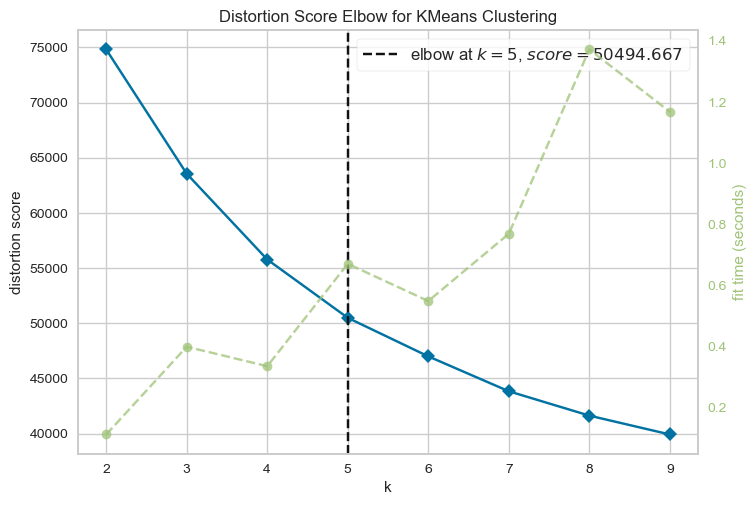

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
from yellowbrick.cluster import KElbowVisualizer
km = KMeans(random_state=42)
visualiser = KElbowVisualizer(km,k=(2,10),metric='distortion')
visualiser.fit((scaled))
visualiser.show()

Seems like 5 cluster labels is proper for this data set

In [17]:
km = KMeans(n_clusters=5,random_state=42)
km.fit(scaled) # exposed to data leakage, a pipeline would solve this for us
print(km.labels_,"\n")
print(km.cluster_centers_,"\n")

[3 3 4 ... 0 2 4] 

[[ 0.44236507 -0.71365802  0.8920895   0.78173369  0.61895122  0.71392009
   3.56148706  3.22296064  1.73302559  0.17650892  2.22244136  0.98578536
   0.5920398 ]
 [-1.00339474  0.30171593 -0.90326111 -0.03903738 -0.40600779 -0.56866724
   3.48930616  3.0963952   1.61660419  0.21764771  1.67981221  0.03575298
   0.57132539]
 [-0.73513175  1.16488707 -1.20650432 -1.39495304 -0.24369036 -0.30718272
   3.76091389  3.17416934  1.59390746  0.13985578  1.36027062  0.07594937
   2.44827586]
 [ 0.26302429 -0.80371659  0.579581    0.60264553 -0.71992421 -0.55988242
   3.43572149  3.19188805  1.73521141  0.13593768  2.18520535  0.99108734
   1.52085561]
 [ 0.91411294  0.27956173  0.416206   -0.21610299  0.72251709  0.67817702
   3.63470663  3.29234593  1.73299816  0.08687906  1.95767048  0.97309252
   2.56874309]] 



In [18]:
from collections import Counter
Counter(km.labels_)

Counter({3: 2803, 4: 2716, 0: 2814, 1: 2768, 2: 2291})

In [19]:
km.cluster_centers_

array([[ 0.44236507, -0.71365802,  0.8920895 ,  0.78173369,  0.61895122,
         0.71392009,  3.56148706,  3.22296064,  1.73302559,  0.17650892,
         2.22244136,  0.98578536,  0.5920398 ],
       [-1.00339474,  0.30171593, -0.90326111, -0.03903738, -0.40600779,
        -0.56866724,  3.48930616,  3.0963952 ,  1.61660419,  0.21764771,
         1.67981221,  0.03575298,  0.57132539],
       [-0.73513175,  1.16488707, -1.20650432, -1.39495304, -0.24369036,
        -0.30718272,  3.76091389,  3.17416934,  1.59390746,  0.13985578,
         1.36027062,  0.07594937,  2.44827586],
       [ 0.26302429, -0.80371659,  0.579581  ,  0.60264553, -0.71992421,
        -0.55988242,  3.43572149,  3.19188805,  1.73521141,  0.13593768,
         2.18520535,  0.99108734,  1.52085561],
       [ 0.91411294,  0.27956173,  0.416206  , -0.21610299,  0.72251709,
         0.67817702,  3.63470663,  3.29234593,  1.73299816,  0.08687906,
         1.95767048,  0.97309252,  2.56874309]])

- 5 cluster centers (rows)
- 13 cluster centers features for each data point (columns)

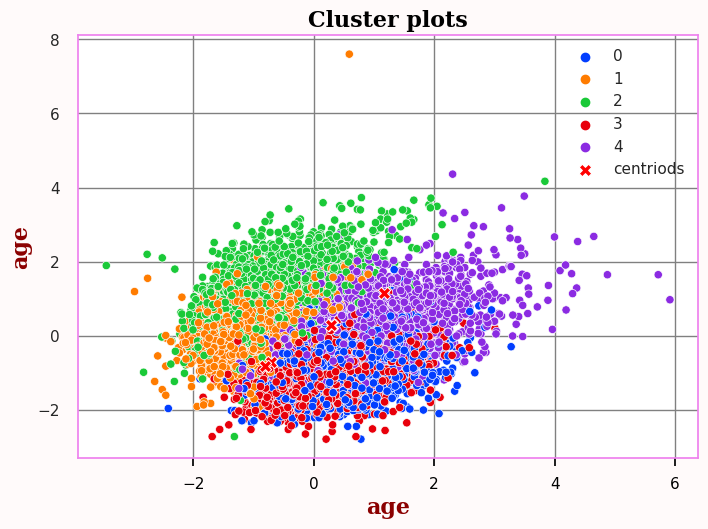

In [20]:
def cluster_plots(x:int,y:int):
    sns.set_theme(rc=rc,style='whitegrid',palette='bright')
    sns.scatterplot(x=scaled_frame.iloc[:,x],y=scaled_frame.iloc[:,y],hue=km.labels_,palette='bright')
    sns.scatterplot(km.cluster_centers_[:,y],km.cluster_centers_[:,y]
    ,marker='X',s= 80, label="centriods",color='red')
    plt.xlabel(f"{scaled_frame.columns[x]}",fontdict=font_label)
    plt.ylabel(f"{scaled_frame.columns[x]}",fontdict=font_label)
    plt.title("Cluster plots",fontdict=font_title)
cluster_plots(0,1)

### **Bringing scaling and clustering together**

In [21]:
from sklearn.pipeline import Pipeline
my_pipe_line = Pipeline(
    [
    ("my_column_transformer",column_transformer),
    ('my_cluster',KMeans(random_state=42,n_clusters=5))
    ]
)

In [22]:
result = my_pipe_line.fit(columns_to_scale)

In [23]:
my_cluster = result.named_steps['my_cluster']

In [24]:
import sklearn
def cluster_plots(x:int,y:int, pipeline_cluster:sklearn.cluster._kmeans.KMeans):
    # improved version for pipleine
    sns.set_theme(rc=rc,style='whitegrid',palette='bright')
    # data points
    sns.scatterplot(x=scaled_frame.iloc[:,x],y=scaled_frame.iloc[:,y]
    ,hue=pipeline_cluster.labels_,palette='bright')

    # centers
    sns.scatterplot(pipeline_cluster.cluster_centers_[:,x]
    ,pipeline_cluster.cluster_centers_[:,y]
    ,marker='X',s= 80, label="centriods",color='red')
    
    # styling
    plt.xlabel(f"{scaled_frame.columns[x]}",fontdict=font_label)
    plt.ylabel(f"{scaled_frame.columns[y]}",fontdict=font_label)
    plt.title("Cluster plots",fontdict=font_title)

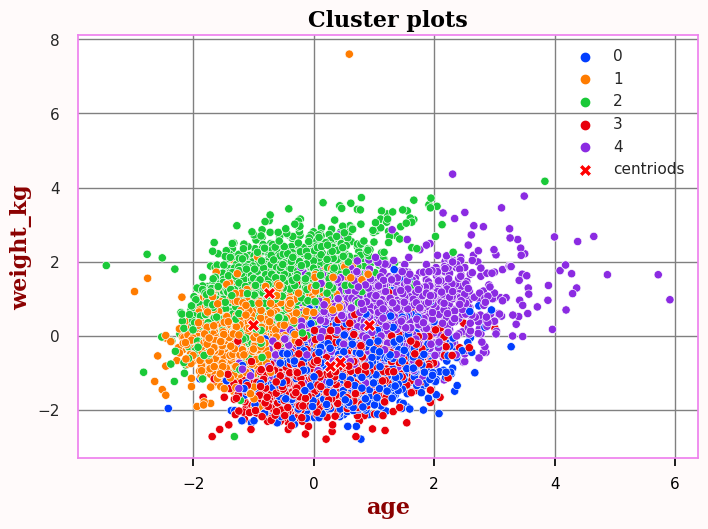

In [25]:
cluster_plots(0,1,my_cluster)

In [26]:
def threed_cluster_plots(x:int,y:int,z:int, pipeline_cluster:sklearn.cluster._kmeans.KMeans):
    fig = px.scatter_3d(scaled_frame,
                        x=scaled_frame.iloc[:,x],
                        y=scaled_frame.iloc[:,y],
                        z=scaled_frame.iloc[:,z],
                        opacity=1,
                        size_max=18,
                        symbol=pipeline_cluster.labels_,
                        color=pipeline_cluster.labels_) # color=km.labels_, symbol=km.labels_

    fig.update_layout(scene = dict(
                        xaxis_title=f"{scaled_frame.columns[x]}",
                        yaxis_title=f"{scaled_frame.columns[y]}",
                        zaxis_title=f"{scaled_frame.columns[z]}"
                        ),
                        width=700,
                        margin=dict(r=20, b=10, l=10, t=10)
                        )

    # Hide colorbar axis
    fig.update_layout(coloraxis_showscale=False)
    # fig.update_traces(marker={'colorbar_xpad':0,
    #                         'showscale':False})

    fig.show()

In [27]:
threed_cluster_plots(0,1,2,my_cluster)

### **Combining clusters with scaled data**

In [28]:
cluster = scaled_frame.copy()
cluster['clusters'] = my_cluster.labels_

In [29]:
cluster.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1.0,3.0,4
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1.0,0.0,3
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1.0,2.0,0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1.0,3.0,3
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1.0,3.0,4


In [30]:
cluster['clusters'] = cluster['clusters'].astype('category')
cluster['encoded_class'] = cluster['encoded_class'].astype('int8').astype('category')
cluster['gender'] = cluster['gender'].astype('int8').astype('category')

In [31]:
cluster.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1,3,4
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1,0,3
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1,2,0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1,3,3
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1,3,4


In [32]:
cluster.dtypes

age                        float64
weight_kg                  float64
height_m                   float64
bmi                        float64
body_fat_percent           float64
grip_force                 float64
sit_ups_counts             float64
sit_and_bend_forward_m     float64
broad_jump_m               float64
diastolic                  float64
systolic                   float64
gender                    category
encoded_class             category
clusters                  category
dtype: object

In [33]:
cond = (cluster.clusters == 0) | (cluster.clusters ==1)
cluster[cond].sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
9151,1.535853,-0.363755,1.509279,1.206863,-0.353527,0.255754,3.178054,3.286943,1.825,0.261,2.52,1,1,0
12081,1.242932,-0.639368,1.349273,0.646496,-0.167337,1.479495,3.401197,3.427340,1.662,0.217,2.12,1,2,0
180,-0.832623,1.165896,-0.382563,0.226221,0.484325,-0.220146,3.178054,3.110439,1.638,0.288,1.64,0,0,1
370,-0.681977,-0.418877,-0.561394,0.016084,-0.074243,-0.832016,3.828641,3.184867,1.600,0.115,2.20,1,1,1
1105,-0.715454,-0.570464,0.558652,0.296267,0.298136,1.547481,4.127134,3.170014,1.607,0.124,1.85,1,0,0


In [34]:
cluster.sample(n=5,random_state=42)

,age,weight_kg,height_m,bmi,body_fat_percent,grip_force,sit_ups_counts,sit_and_bend_forward_m,broad_jump_m,diastolic,systolic,gender,encoded_class,clusters
10773,0.339061,-0.294852,-0.373151,-0.964558,1.415270,0.527696,3.091042,3.191311,1.751,0.103,1.82,1,3,4
5496,-0.012444,-0.722051,1.085732,0.856633,-1.377567,-0.016189,3.761200,3.279001,1.623,0.152,2.19,1,0,3
13054,1.929204,-1.176813,2.544616,0.366313,0.763608,-0.356117,3.610918,3.381114,1.785,0.264,2.62,1,2,0
11825,1.510745,-0.763393,1.179854,0.226221,-0.260432,-0.560074,3.401197,3.285682,1.823,0.122,2.54,1,3,3
1326,1.760147,1.703341,-0.062550,-1.524925,-0.260432,-0.016189,3.988984,3.372342,1.773,0.064,1.83,1,3,4


In [35]:
cluster.to_csv("classification_dataset_two.csv",index=False)